In [3]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#imports the train_test_split function from the Scikit-learn library.

#Scikit-learn: machine learning library in Python

#train_test_split is a function used to split datasets into training and testing sets,
#which is crucial for evaluating machine learning models.


In [24]:
#Downloading the data from sklearn
from sklearn.datasets import load_iris
#imports the load_iris function from Scikit-learn's
#built-in datasets module.
iris_data = load_iris()
#Now, iris_data will contain:
#data:measurements of sepal length, sepal width, petal length, and petal width for each sample in the dataset.
#target: The target variable or labels, indicating the species (Setosa, Versicolor, or Virginica) for each sample.
#target_names: The names of the three species.
#feature_names: The names of the four features.

df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target_names[iris_data.target]

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


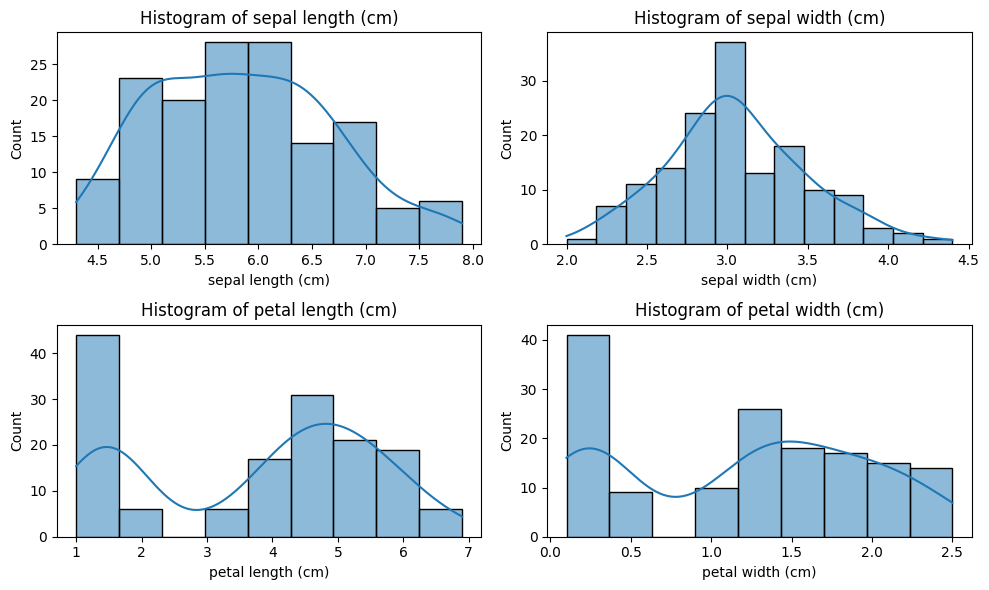

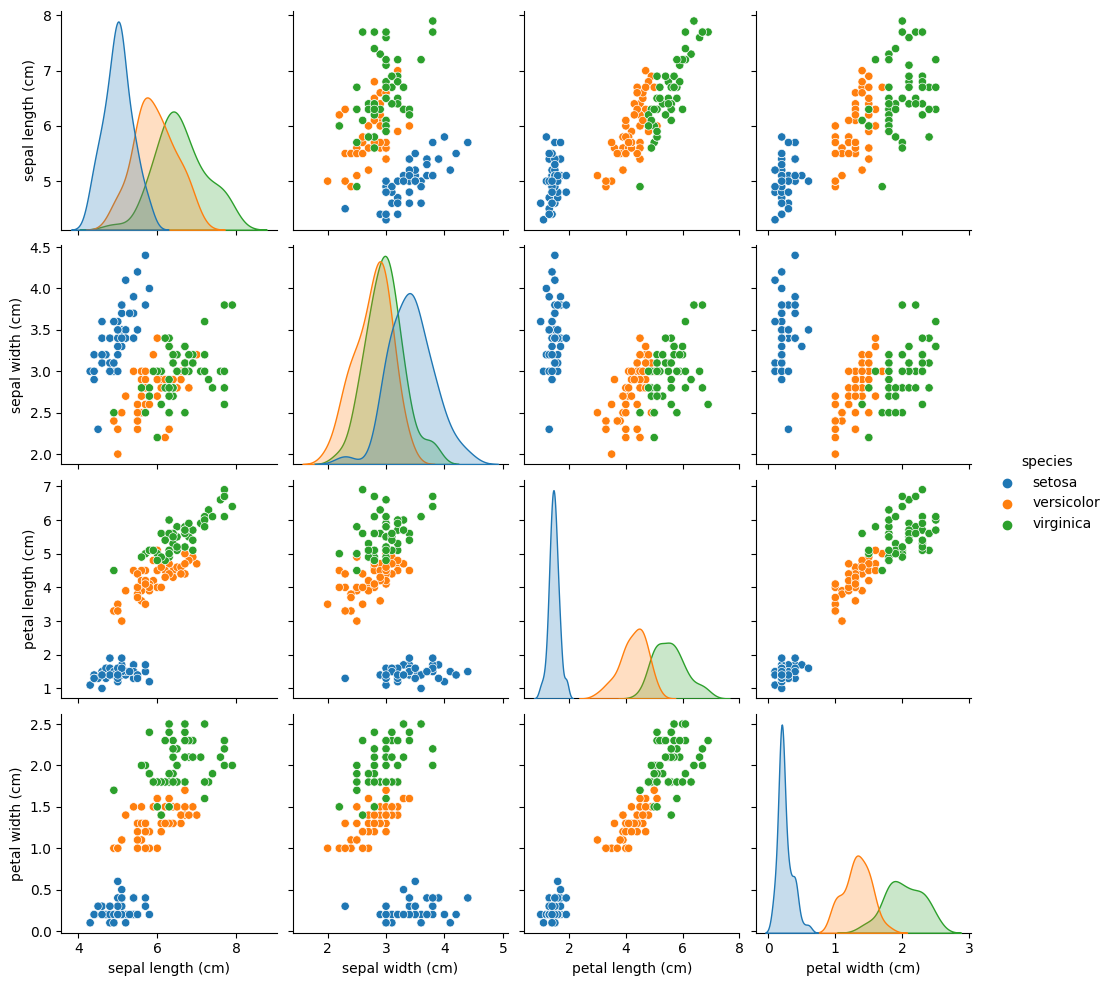

In [14]:
#Data exploration
# Histograms of each feature
plt.figure(figsize=(10, 6)) #sets size of figure, 10 inches width, 6 height
for i, feature in enumerate(iris_data.feature_names):
  #loop iterates through each feature in the dataset using enumerate.
  #i represents the index of the current feature, and feature represents the name of the feature.
    plt.subplot(2, 2, i+1)
    #This line creates subplots within the figure.
    #It arranges the subplots in a 2x2 grid, where i+1 is the position of the current subplot in the grid
    sns.histplot(df[feature], kde=True)
    #This line uses Seaborn's histplot function to create a histogram for the current feature (df[feature]).
    #The kde=True parameter adds a Kernel Density Estimation curve on top of the histogram.
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
#This line adjusts the spacing between the subplots to prevent overlapping.
plt.show()

# Scatter plot matrix
sns.pairplot(df, hue='species')
#This line uses Seaborn's pairplot function to create a scatter plot matrix.
#It plots pairwise relationships between features in the DataFrame df.
#The hue='species' colors the data points based on the species (target variable) in the dataset, allowing us to visually distinguish the different species.

plt.show()


<ipython-input-15-a4b51c331ba6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


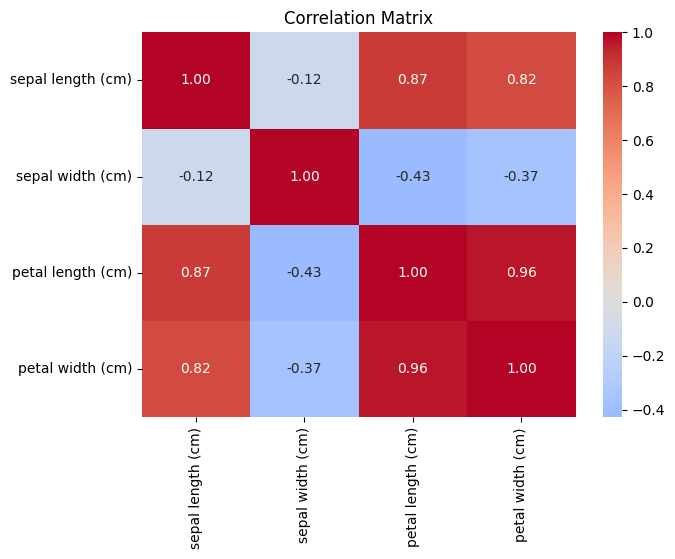

In [15]:
#Correlation Matrix
correlation_matrix = df.corr()
#his line computes the correlation between all pairs of numeric columns in the DataFrame df.
#It calculates the Pearson correlation coefficient, which measures the linear relationship between two variables.
#The result is stored in the correlation_matrix DataFrame.
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
#This line uses Seaborn's heatmap function to create a color-coded representation of the correlation matrix.
#correlation_matrix: The input data for the heatmap is the correlation matrix that we computed in the previous step.
#annot=True adds the numerical values of the correlation coefficients to each cell of the heatmap.
#cmap='coolwarm' sets the color map for the heatmap. It uses cool colors for negative correlations and warm colors for positive correlations.
#center=0 sets the center value of the color map, which is 0 in this case. It helps to better visualize positive and negative correlations around the center.
#fmt='.2f' specifies the format of the numerical values displayed in the heatmap cells. '.2f' means displaying the values with two decimal places.

plt.title("Correlation Matrix")
plt.show()

In [16]:
#Splitting Dataset - Data preprocessing
X = df.drop('species', axis=1)  # Features (sepal length, sepal width, petal length, petal width)
#To drop the species column. axis=1 to indicate we want to drop column
y = df['species']               # Labels (species)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Setting a fixed random seed ensures that every time you run the code, the data will be split in the same way, providing consistent results.


In [25]:
#USING LOGISTIC REGRESSION

from sklearn.preprocessing import StandardScaler
#standardscaler helps to scale the data. weight, height have diff scales - kgs, cm. standard scaler gets them on the same scale
#so that algorithm won't be distracted. Mean is 0, var = 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler() #initializes a StandardScaler object named scaler.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#This line standardizes the training features (X_train) using the fit_transform method of the StandardScaler.
#The fit_transform method computes the mean and standard deviation of each feature in the training data
# and then scales the features accordingly.

model = LogisticRegression(solver='liblinear', max_iter=1000)
#initializes a LogisticRegression model object named model. We pass two parameters to the constructor:
#solver='liblinear': This specifies the solver used for optimization. 'liblinear' is a good choice for small datasets.
#max_iter=1000: This sets the maximum number of iterations for the optimization algorithm to converge to find the optimal parameters.

#WHY LIBLINEAR?? Imagine you have a bunch of points on a graph, and you want the computer to draw a straight line that separates them into two groups. liblinear is like a smart drawing tool that figures out the best line to separate the points correctly.

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
#calculates the accuracy of the model's predictions.
#The accuracy_score function is used to compare the predicted labels (y_pred) with the true labels of the testing set (y_test).

print(f"Accuracy: {accuracy:.2f}") #upto 2 decimals


Accuracy: 0.97


In [26]:
#USING DECISION TREE - prone to overfitting
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [30]:
#USING RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3, random_state=42)
#n_estimators, which specifies the number of decision trees in the random forest.
#Increasing the number of trees generally improves the performance of the model, but it may also increase training time
#When I use 2 decision trees, accuracy = 0.97, compared to 3 decision trees = 1.00
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


In [33]:
#USING GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1, random_state=42)
#Even with just 1 as value of n_estimator, accuracy score is 100%, probably because it is a small dataset
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00
